In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
from math import cos, sin
import os
import pickle


In [18]:
yaw_model = pickle.load(open('yaw.sav', 'rb'))
pitch_model = pickle.load(open('pitch.sav', 'rb'))
roll_model = pickle.load(open('roll.sav', 'rb'))

In [64]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size=50):
    yaw = -yaw

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

In [57]:

def extract_features(image):
    x=[]
    y=[]
    ex=[]
    mp_face_mesh=mp.solutions.face_mesh.FaceMesh(static_image_mode=True,max_num_faces=2)
    #Face Mesh
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result=mp_face_mesh.process(img)
    height,width,_=image.shape 
    if result.multi_face_landmarks!=None and len(result.multi_face_landmarks)==1: 
        for facial_landmarks in result.multi_face_landmarks:
            for i in range(0,468):
                pt1=facial_landmarks.landmark[i]
                x.append(pt1.x *width)
                y.append(pt1.y *height)
   
    x=np.array(x).reshape(1,-1)
    y=np.array(y).reshape(1,-1)
    nose_x=x[0,1]
    nose_y=y[0,1]
    x=x-x[0,1]
    y=y-y[0,1]
    dist=np.sqrt(x[0,377]**2+y[0,377]**2)
    z=np.concatenate((x,y),axis=1)/dist    
    return z,nose_x,nose_y


-0.0836698 -0.09809946 0.045110047


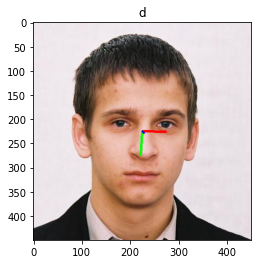

In [87]:
image = cv2.imread("AFLW2000/image00053.jpg")
mat = sio.loadmat('AFLW2000/image00053.mat')
pitch, yaw, roll, h, v,t, scale = mat['Pose_Para'][0]
res_img = draw_axis(np.asarray(image), yaw, pitch, roll)
plt.imshow(cv2.cvtColor(res_img, cv2.COLOR_BGR2RGB))
plt.title("d")
print(pitch,yaw,roll)

[-0.14581166] [-0.09256417] [0.0227555]


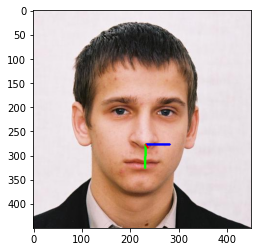

In [86]:
image = cv2.imread("AFLW2000/image00053.jpg")
img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
z,nose_x,nose_y= extract_features(img)
yaw=yaw_model.predict(z)
pitch=pitch_model.predict(z)
roll=roll_model.predict(z)
res_img=draw_axis(np.asarray(img),yaw,pitch,roll,nose_x,nose_y)
plt.imshow(res_img)
print(pitch,yaw,roll)

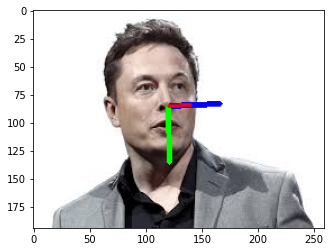

In [88]:
image = cv2.imread("images.jpg")
img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
z,nose_x,nose_y= extract_features(img)
yaw=yaw_model.predict(z)
pitch=pitch_model.predict(z)
roll=roll_model.predict(z)
res_img=draw_axis(np.asarray(img),yaw,pitch,roll,nose_x,nose_y)
plt.imshow(res_img)

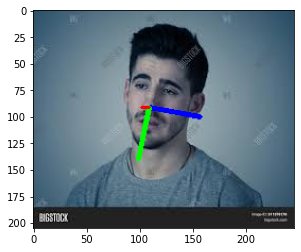

In [89]:
image = cv2.imread("images1.jpg")
img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
z,nose_x,nose_y= extract_features(img)
yaw=yaw_model.predict(z)
pitch=pitch_model.predict(z)
roll=roll_model.predict(z)
res_img=draw_axis(np.asarray(img),yaw,pitch,roll,nose_x,nose_y)
plt.imshow(res_img)

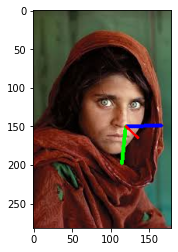

In [90]:
image = cv2.imread("images2.jpg")
img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
z,nose_x,nose_y= extract_features(img)
yaw=yaw_model.predict(z)
pitch=pitch_model.predict(z)
roll=roll_model.predict(z)
res_img=draw_axis(np.asarray(img),yaw,pitch,roll,nose_x,nose_y)
plt.imshow(res_img)

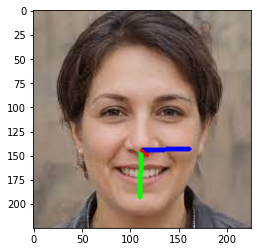

In [91]:
image = cv2.imread("images3.jpg")
img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
z,nose_x,nose_y= extract_features(img)
yaw=yaw_model.predict(z)
pitch=pitch_model.predict(z)
roll=roll_model.predict(z)
res_img=draw_axis(np.asarray(img),yaw,pitch,roll,nose_x,nose_y)
plt.imshow(res_img)

In [79]:
# #video with media pipe

cap=cv2.VideoCapture("video.mp4")
fourcc=cv2.VideoWriter_fourcc(*'XVID')
check, frame = cap.read()
height, width, _ = frame.shape

out =cv2.VideoWriter('output.mp4',fourcc,20.0,(width,height))                        
print(cap.isOpened())
mp_face_mesh=mp.solutions.face_mesh.FaceMesh(static_image_mode=True,max_num_faces=2)
while(cap.isOpened()):
    ret,frame= cap.read()
    if ret== True:
        x=[]
        y=[]
        #Face Mesh
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result=mp_face_mesh.process(img)
        height,width,_=img.shape 
        if result.multi_face_landmarks!=None and len(result.multi_face_landmarks)==1: 
            for facial_landmarks in result.multi_face_landmarks:
                for i in range(0,468):
                    pt1=facial_landmarks.landmark[i]
                    x.append(pt1.x *width)
                    y.append(pt1.y *height)

            x=np.array(x).reshape(1,-1)
            y=np.array(y).reshape(1,-1)
            
            nose_x=x[0,1]
            nose_y=y[0,1]
            x=x-x[0,1]
            y=y-y[0,1]
            dist=np.sqrt(x[0,377]**2+y[0,377]**2)
            z=np.concatenate((x,y),axis=1)/dist    
            yaw=yaw_model.predict(z)
            pitch=pitch_model.predict(z)
            roll=roll_model.predict(z)
            v_img=draw_axis(np.asarray(frame),yaw,pitch,roll,nose_x,nose_y)
            
            out.write(v_img)
            cv2.imshow('frame',v_img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()




True
